# Number Plate Detection


In [4]:
!unzip ImageDataset.zip

Archive:  ImageDataset.zip
   creating: ImageDataset/
  inflating: __MACOSX/._ImageDataset  
  inflating: ImageDataset/77.png     
  inflating: __MACOSX/ImageDataset/._77.png  
  inflating: ImageDataset/63.png     
  inflating: __MACOSX/ImageDataset/._63.png  
  inflating: ImageDataset/62.png     
  inflating: __MACOSX/ImageDataset/._62.png  
  inflating: ImageDataset/76.png     
  inflating: __MACOSX/ImageDataset/._76.png  
  inflating: ImageDataset/60.png     
  inflating: __MACOSX/ImageDataset/._60.png  
  inflating: ImageDataset/74.png     
  inflating: __MACOSX/ImageDataset/._74.png  
  inflating: ImageDataset/48.png     
  inflating: __MACOSX/ImageDataset/._48.png  
  inflating: ImageDataset/49.png     
  inflating: __MACOSX/ImageDataset/._49.png  
  inflating: ImageDataset/75.png     
  inflating: __MACOSX/ImageDataset/._75.png  
  inflating: ImageDataset/61.png     
  inflating: __MACOSX/ImageDataset/._61.png  
  inflating: ImageDataset/59.png     
  inflating: __MACOSX/ImageDa

In [5]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,941 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [6]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!sudo apt-get install qt5-default

Reading package lists... Done
Building dependency tree       
Reading state information... Done
qt5-default is already the newest version (5.12.8+dfsg-0ubuntu2.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [81]:
import os
import sys
import numpy as np
import cv2
import imutils
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from pytesseract import pytesseract
from scipy.stats import ttest_ind



In [9]:
# Image Reading
def image_read_image(imagePath):
    image = cv2.imread(imagePath)
    return image

In [10]:
# display Image 
def displayImage(image, name):
  plt.figure(figsize=(10, 10))
  plt.title(name)
  plt.imshow(image)
  plt.show()

In [71]:
def getNumberPlateTextFromImage(imgPath):
    imgPath = '/content/ImageDataset/' + str(i) + '.png'
    # Load the image
    img = cv2.imread(imgPath)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to the grayscale image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection to the blurred image
    canny = cv2.Canny(blur, 50, 150)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort the contours by area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Loop over the contours and check if any of them are a rectangle with the right aspect ratio
    for contour in contours:
      perimeter = cv2.arcLength(contour, True)
      approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
      if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        #if aspect_ratio >= 2.5 and aspect_ratio <= 5.5:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, 'Number Plate', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        break
    number_plate = img[y:y+h, x:x+w]

    
    displayImage(number_plate, 'Number Plate Detection for :'+ str(i))
    # Convert the image to grayscale
    gray = cv2.cvtColor(number_plate, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to the grayscale image
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Perform text recognition using pytesseract
    text = pytesseract.image_to_string(thresh, config='--psm 11')
   
    return text



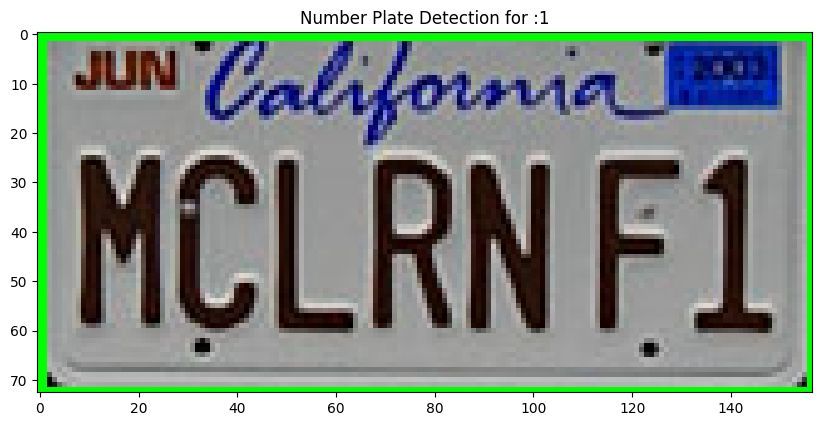

Number plate text:1 IN Califouria ee

Paso



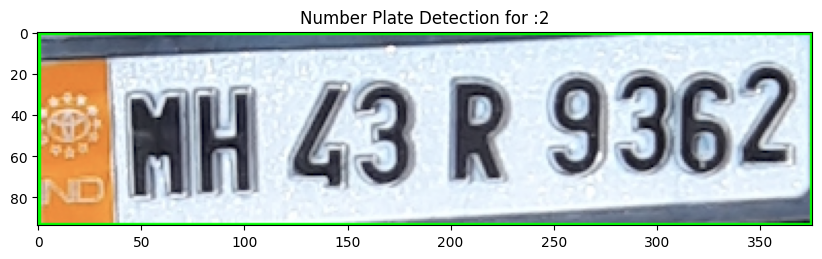

Number plate text:2 “TWEE



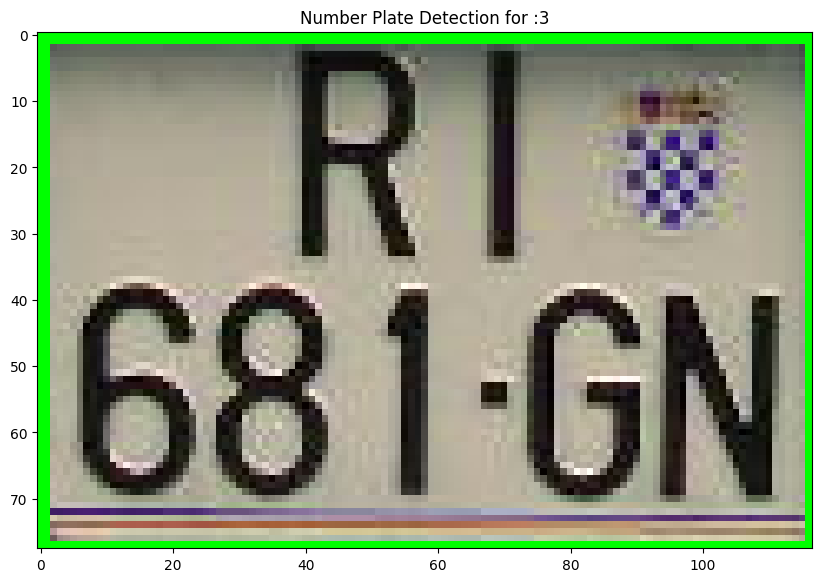

Number plate text:3 Pet



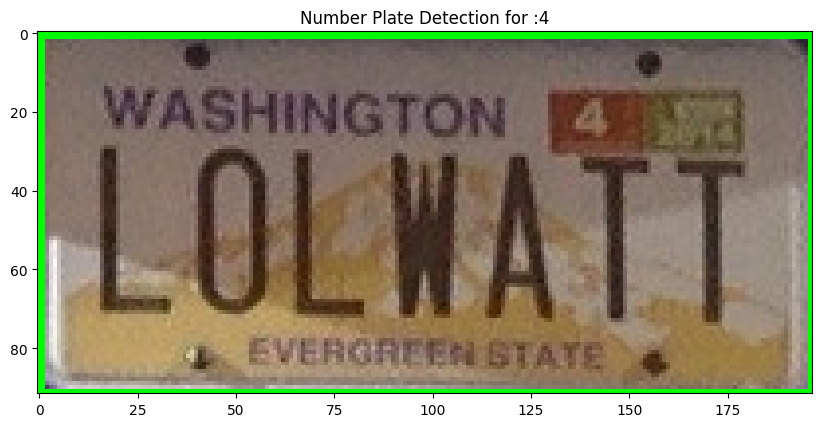

Number plate text:4 COrWMaTT



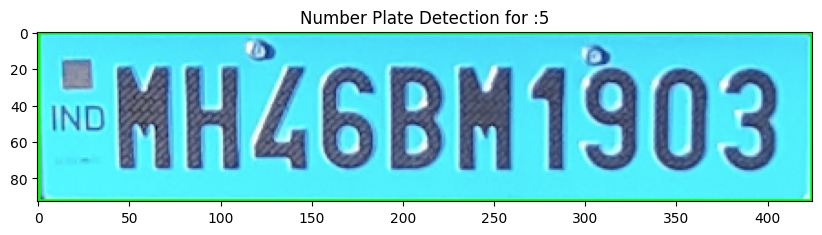

Number plate text:5 "MH46BM1903



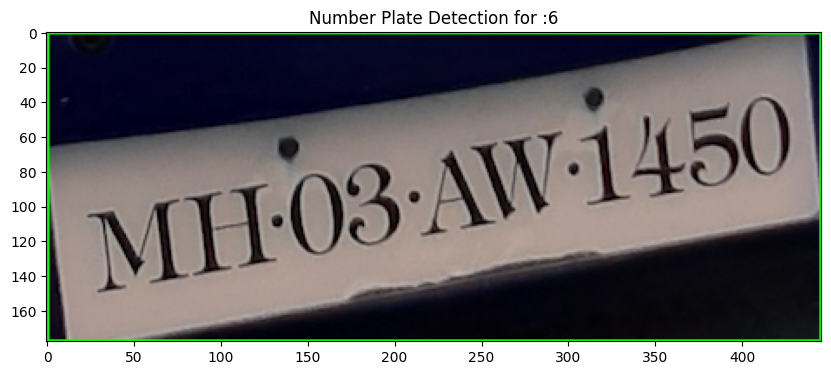

Number plate text:6 Ruies

2. ANN re aU



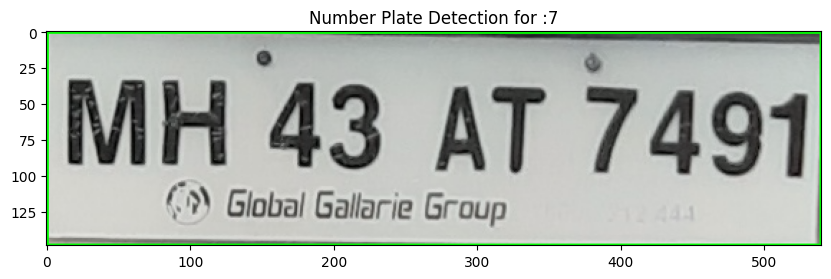

Number plate text:7 CCT



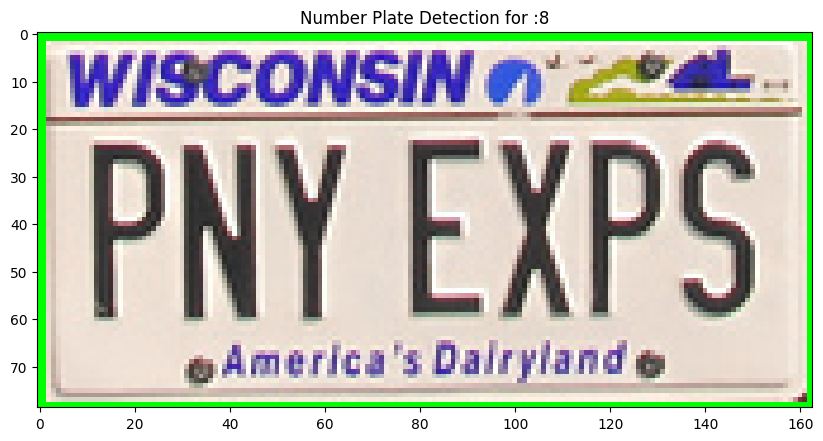

Number plate text:8 ies



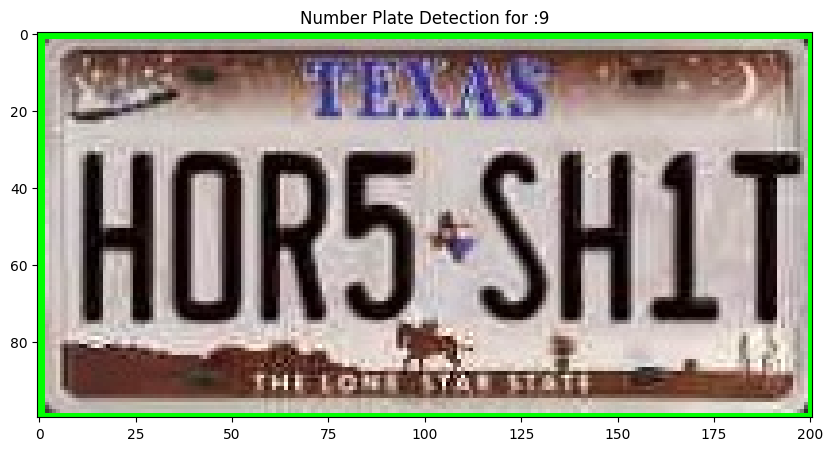

Number plate text:9 LOAN



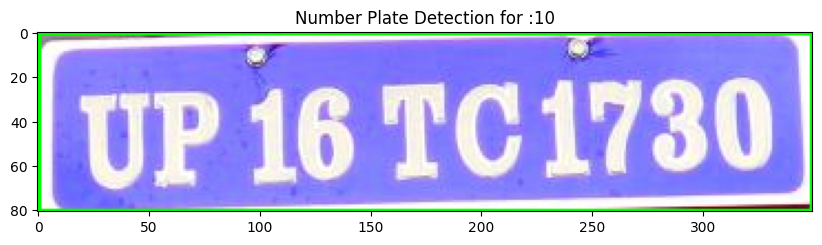

Number plate text:10 [UP 16 TC:1730



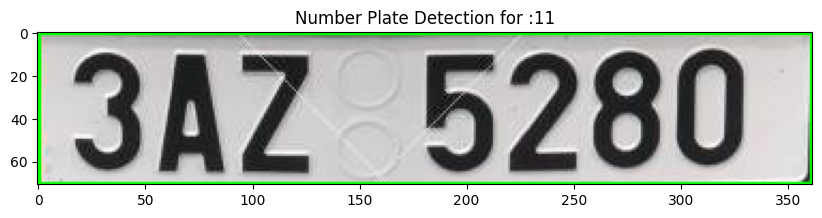

Number plate text:11 3AZ 5280.



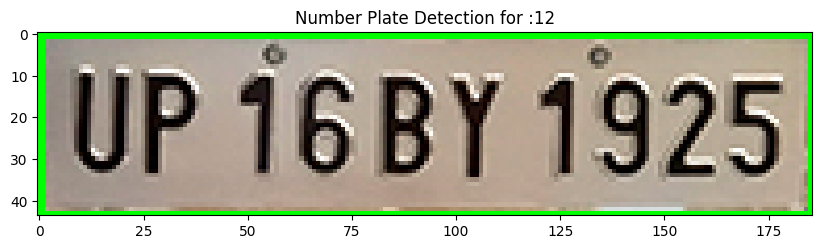

Number plate text:12 UP 76 BY 1925



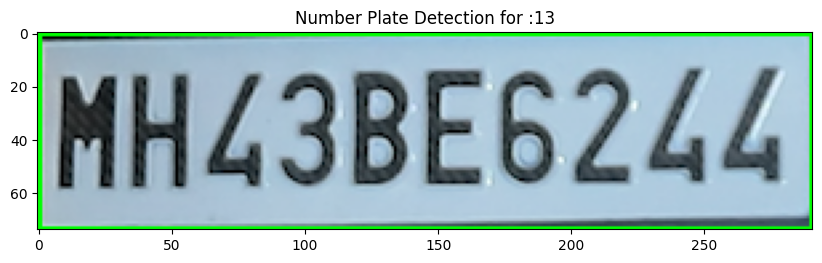

Number plate text:13 MHZ3BE6244



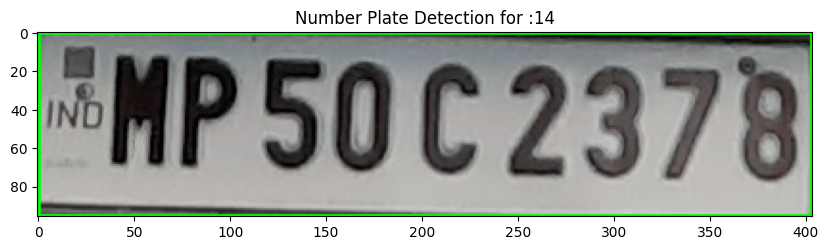

Number plate text:14 le OPEL



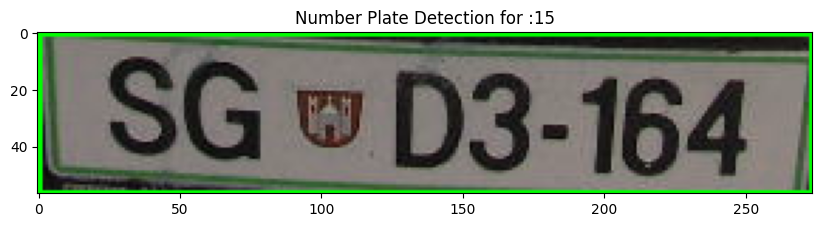

Number plate text:15 Seeks ye



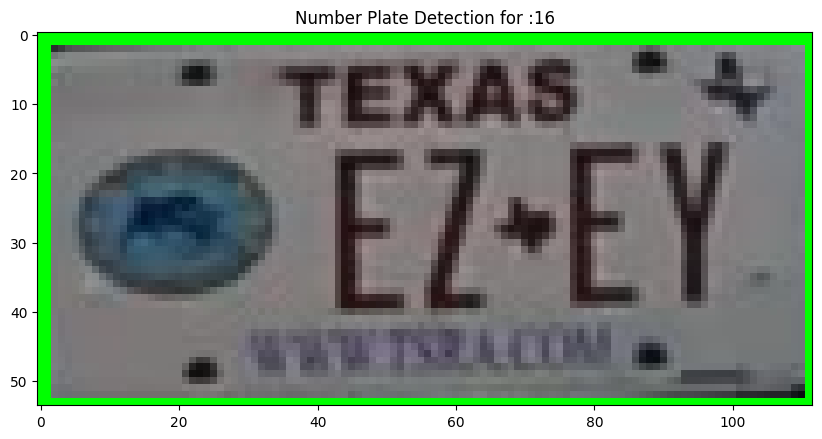

Number plate text:16 ait ad

aaa



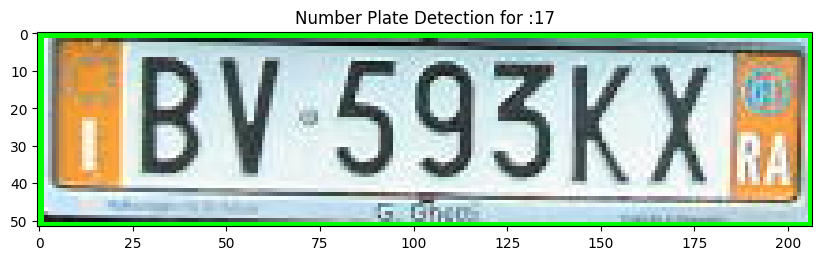

Number plate text:17 EY EEEET OC:



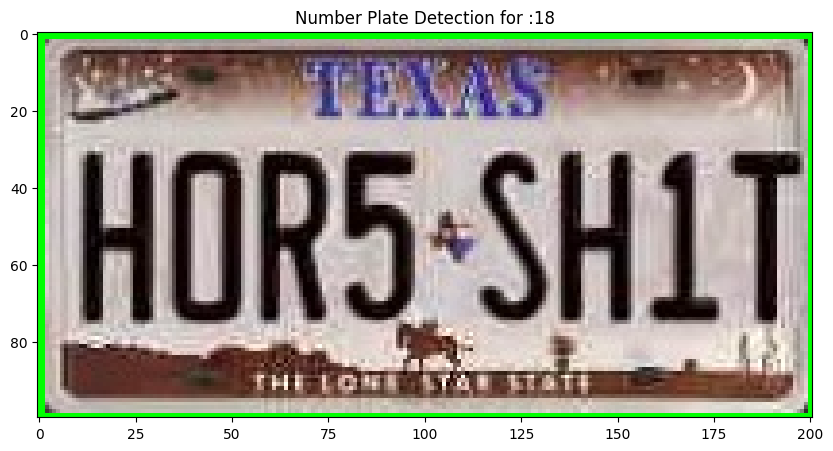

Number plate text:18 LOAN



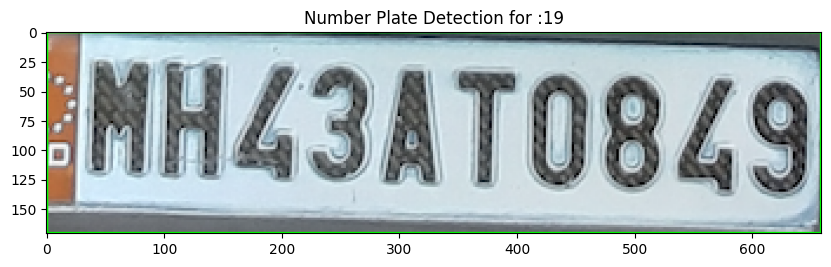

Number plate text:19 LUT A



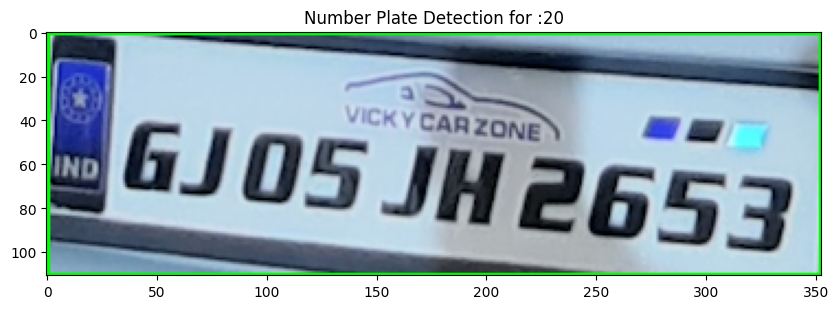

Number plate text:20 Ras rit Pe



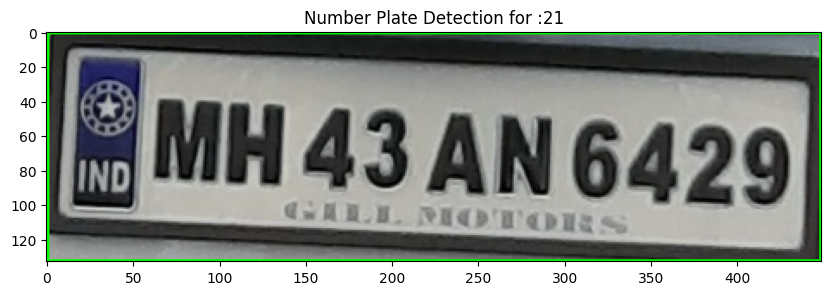

Number plate text:21 


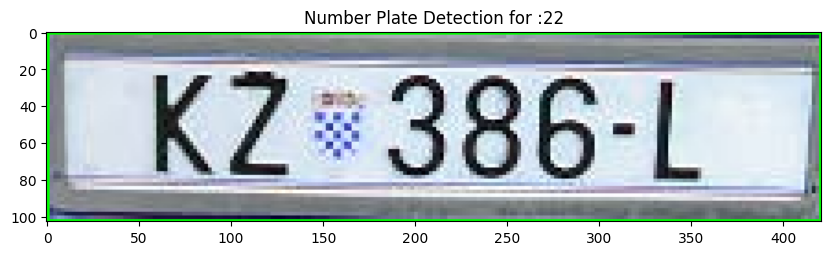

Number plate text:22 a.

KZ#386-L

i

Fin



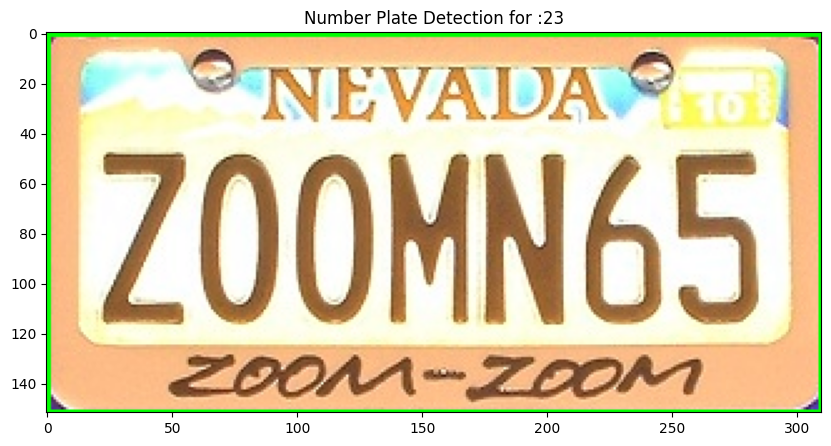

Number plate text:23 NEVADA

ZOOMN65

ZOOhMN=ZoOKT



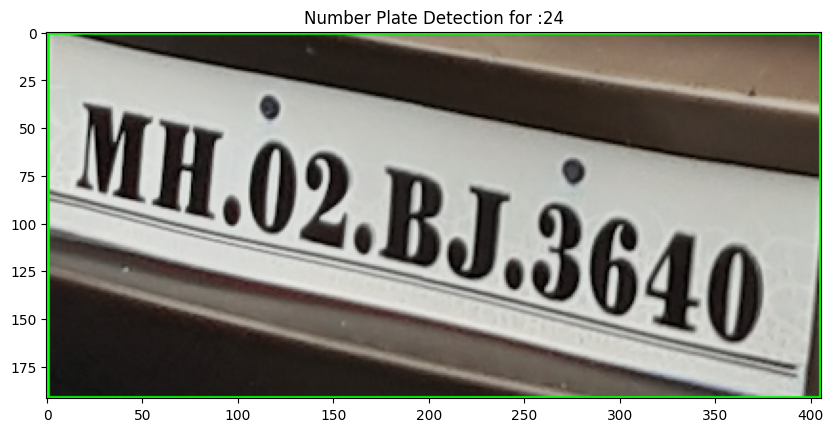

Number plate text:24 a

Mu,

SL!

SET

0

ua



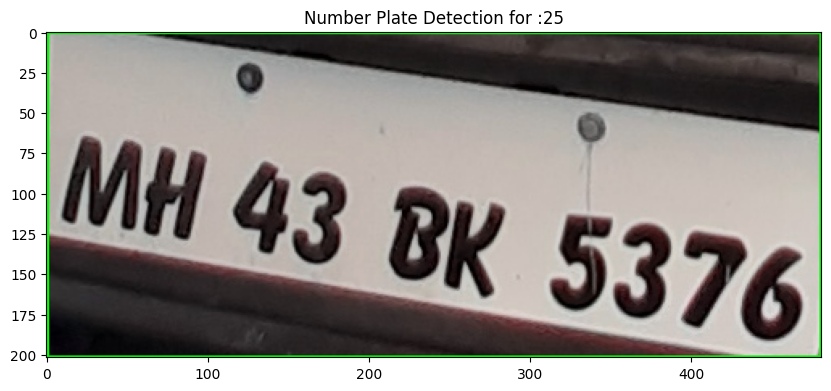

Number plate text:25 Wd

EE (3



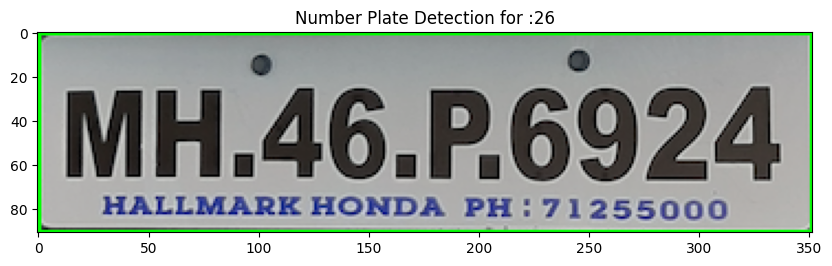

Number plate text:26 


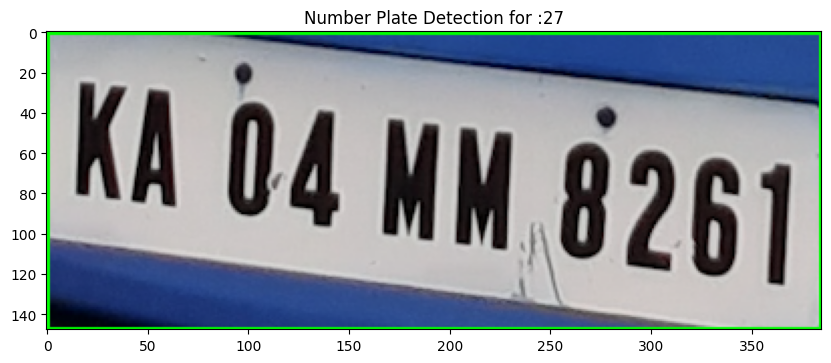

Number plate text:27 TTT



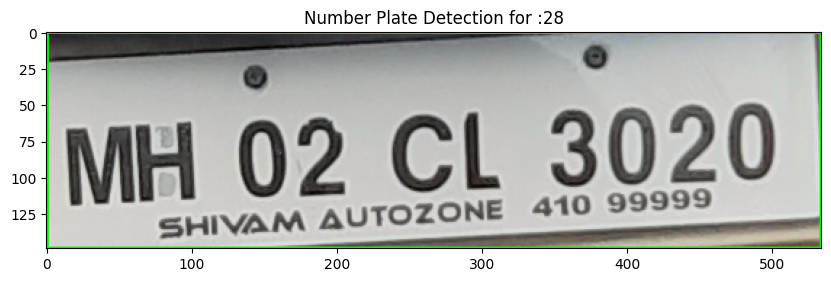

Number plate text:28 ener

PTI NW Ohio 2 souk

Ce

sees



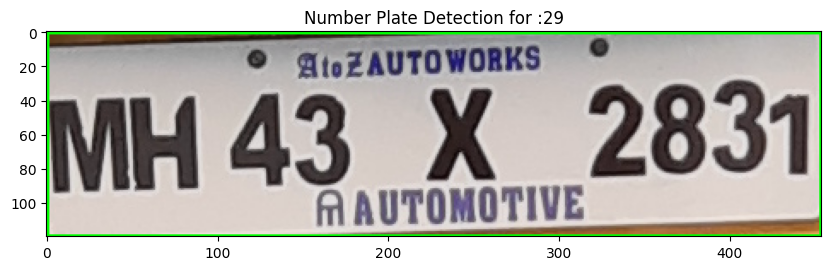

Number plate text:29 Wey MH 43 X 2831

OP WK Meh



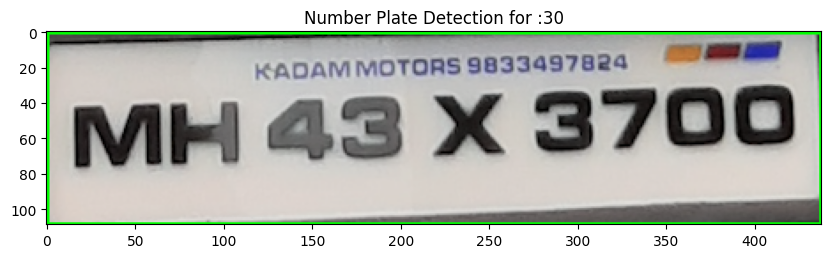

Number plate text:30 Rho E CELL EL Ey

MH 43 X eyLelel



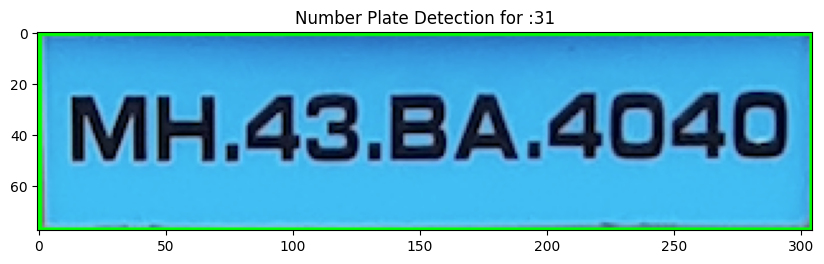

Number plate text:31 aes Lee ele)



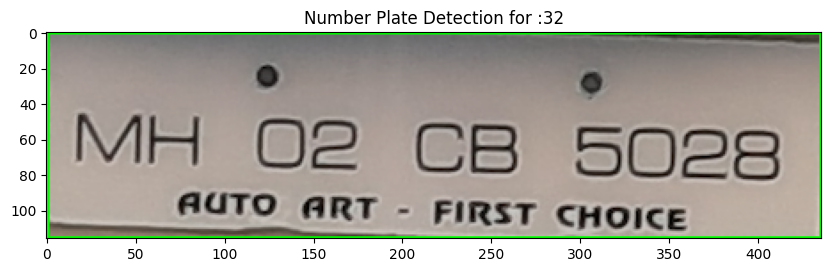

Number plate text:32 a a CB errs

Gee am FIRST CHOICE



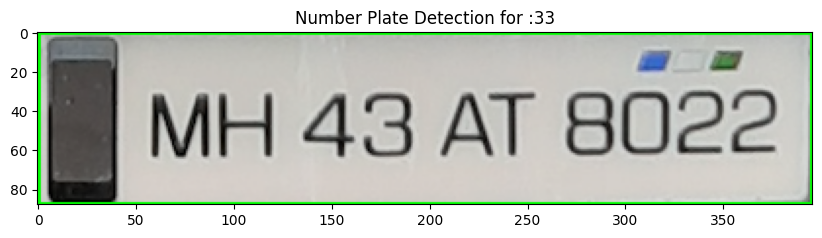

Number plate text:33 | MH 43 AT 8022 |



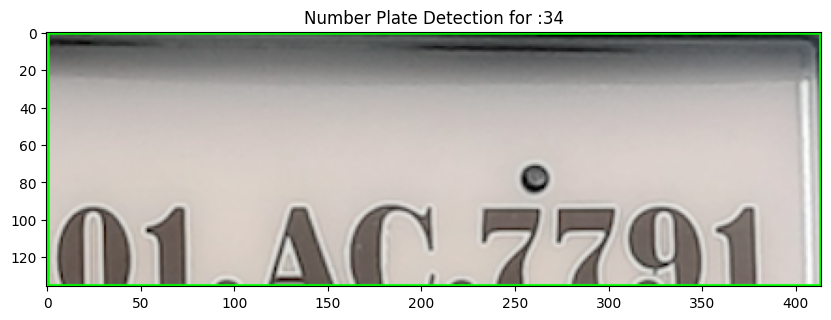

Number plate text:34 ee

a1 Ac 77a1



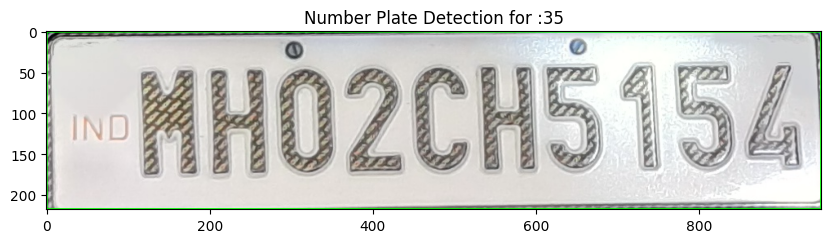

Number plate text:35 a

nian ie

ee

ee

eee

ao

rs

|

i

oy

7

—_



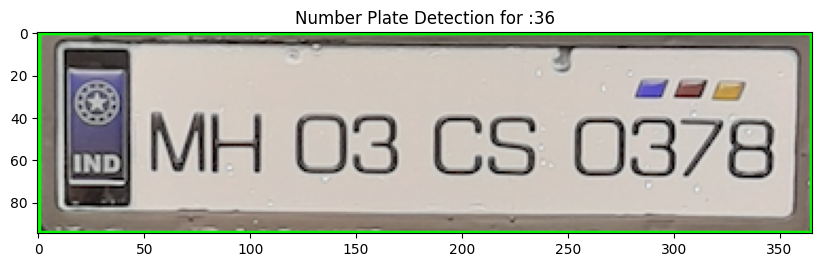

Number plate text:36 H O3 CS 0378



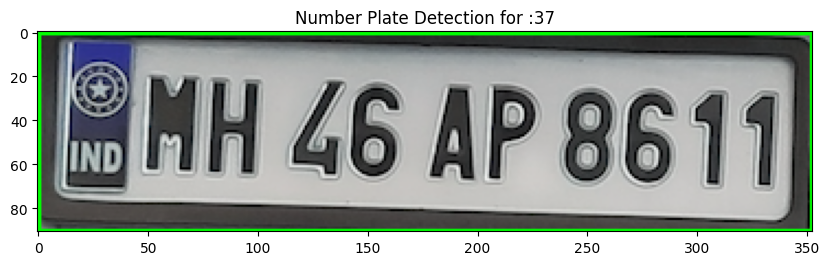

Number plate text:37 


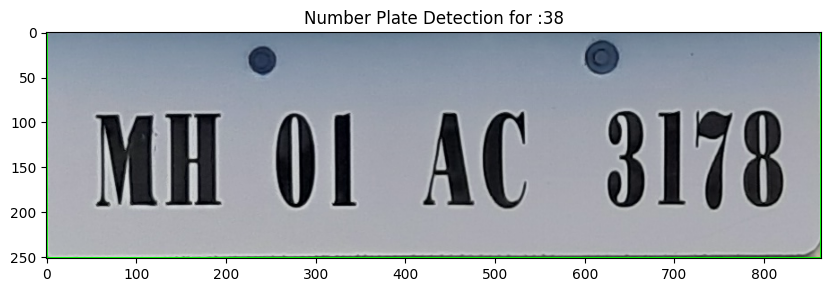

Number plate text:38 TRO ETT



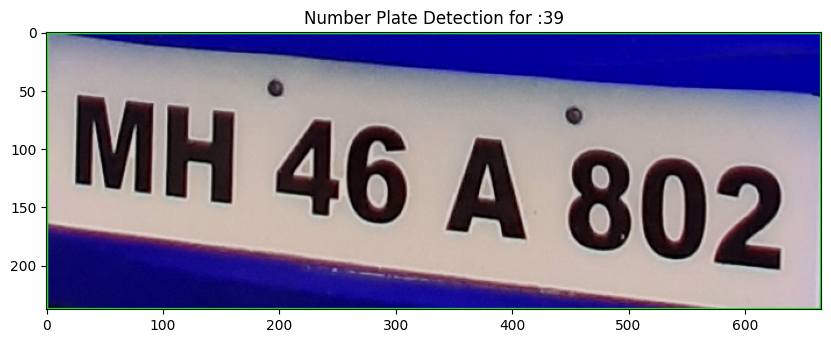

Number plate text:39 Oye



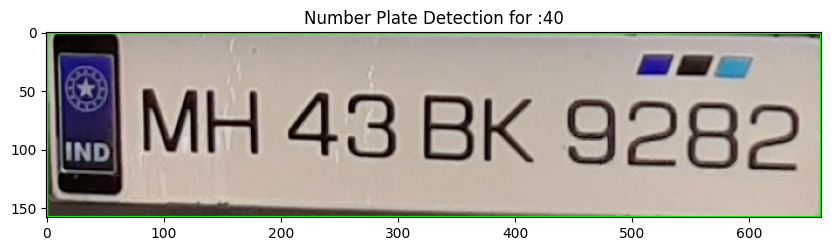

Number plate text:40 «Eel =taeereey



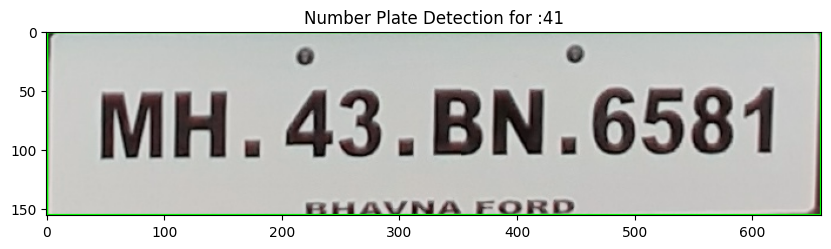

Number plate text:41 TR OE 7

BHAVUNA FORD



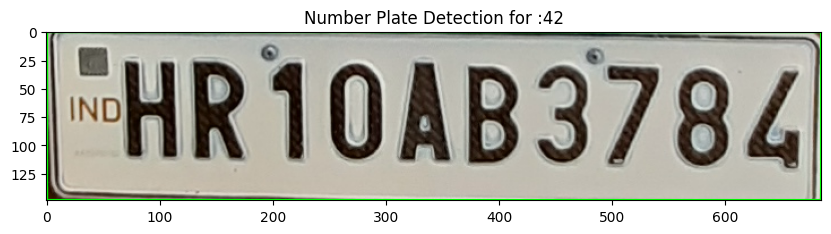

Number plate text:42 HR 10AB3784,



In [72]:
control_imgs = []
test_imgs = []
for i in range(1, 43):
  imgPath = '/content/ImageDataset/' + str(i) + '.png'
  text = getNumberPlateTextFromImage(imgPath)
  if len(text) > 5:
    control_imgs.append(imgPath)
  else:
    test_imgs.append(imgPath)
  # Display the extracted text
  print('Number plate text:'+ str(i), text)


In [79]:

def findT_TestOnImageOutput(control_imgs, test_imgs):

    # Extract the aspect ratios of the images
    control_data = []
    for img_path in control_imgs:
        img = cv2.imread(img_path)
        if img is not None:
            height, width, _ = img.shape
            control_data.append(float(width) / height)

    test_data = []
    for img_path in test_imgs:
        img = cv2.imread(img_path)
        if img is not None:
            height, width, _ = img.shape
            test_data.append(float(width) / height)

    # Calculate the mean performance of the algorithm on each group
    control_mean = np.mean(control_data)
    test_mean = np.mean(test_data)

    # Calculate the t-value and p-value using a two-sided t-test
    t, p = ttest_ind(control_data, test_data, equal_var=False)

    # Print the results
    print("Control mean:", control_mean)
    print("Test mean:", test_mean)
    print("t-value:", t)
    print("p-value:", p)

In [82]:
findT_TestOnImageOutput(control_imgs, test_imgs)

Control mean: 1.122170460580122
Test mean: 1.0701904381152687
t-value: 0.3373764307978922
p-value: 0.7417011713834002
